In [1]:
library('tidyverse')
library('ggrepel')
library('patchwork')
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# slice_max

In [2]:
mpg |> write_csv('mpg.csv')

In [3]:
top.hwy = mpg |> slice_max(hwy, n = 1)

top.hwy

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


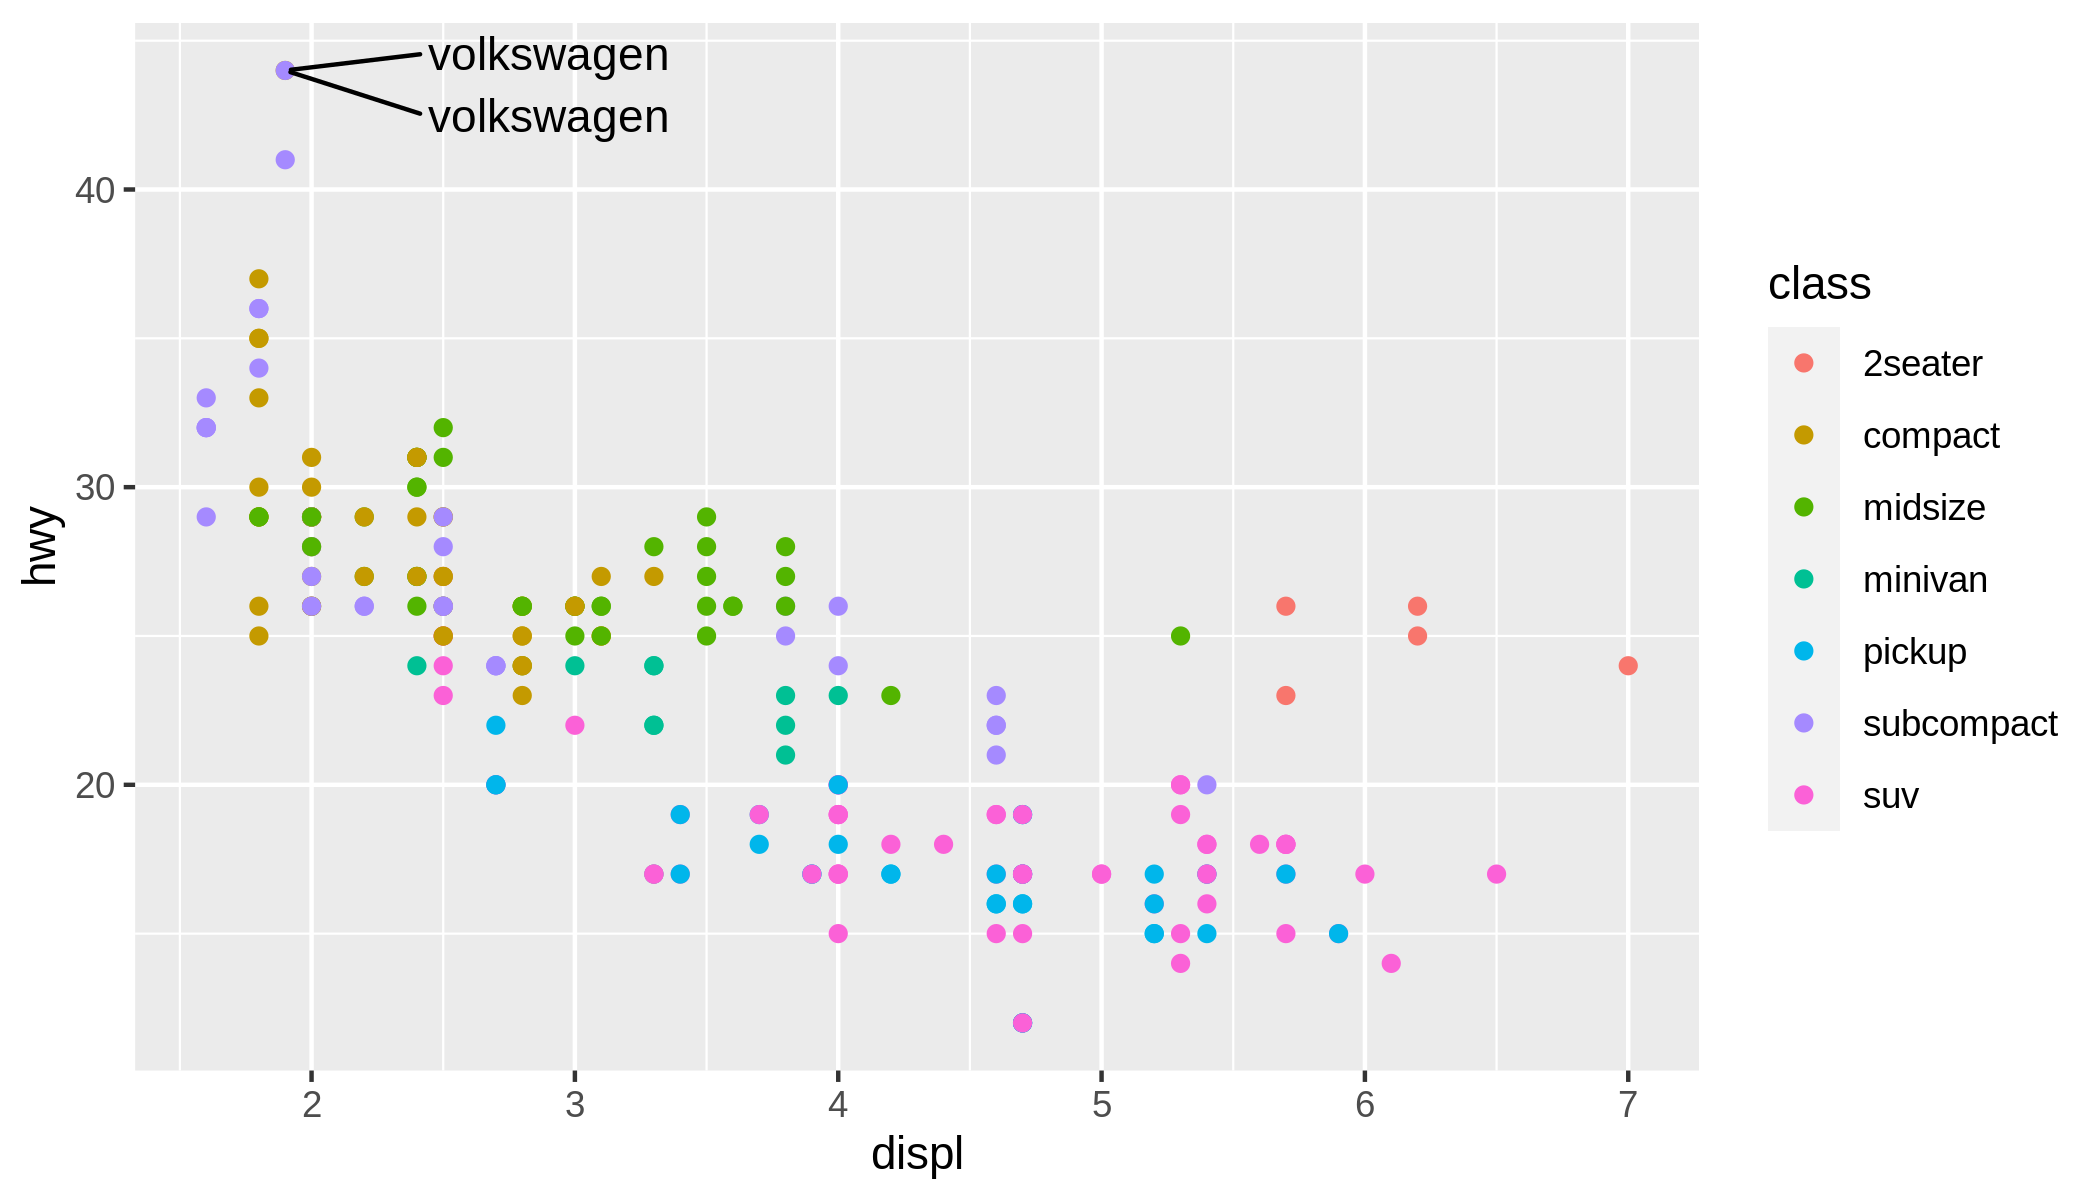

In [4]:
p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')  # this is important

p.hwy = p

p

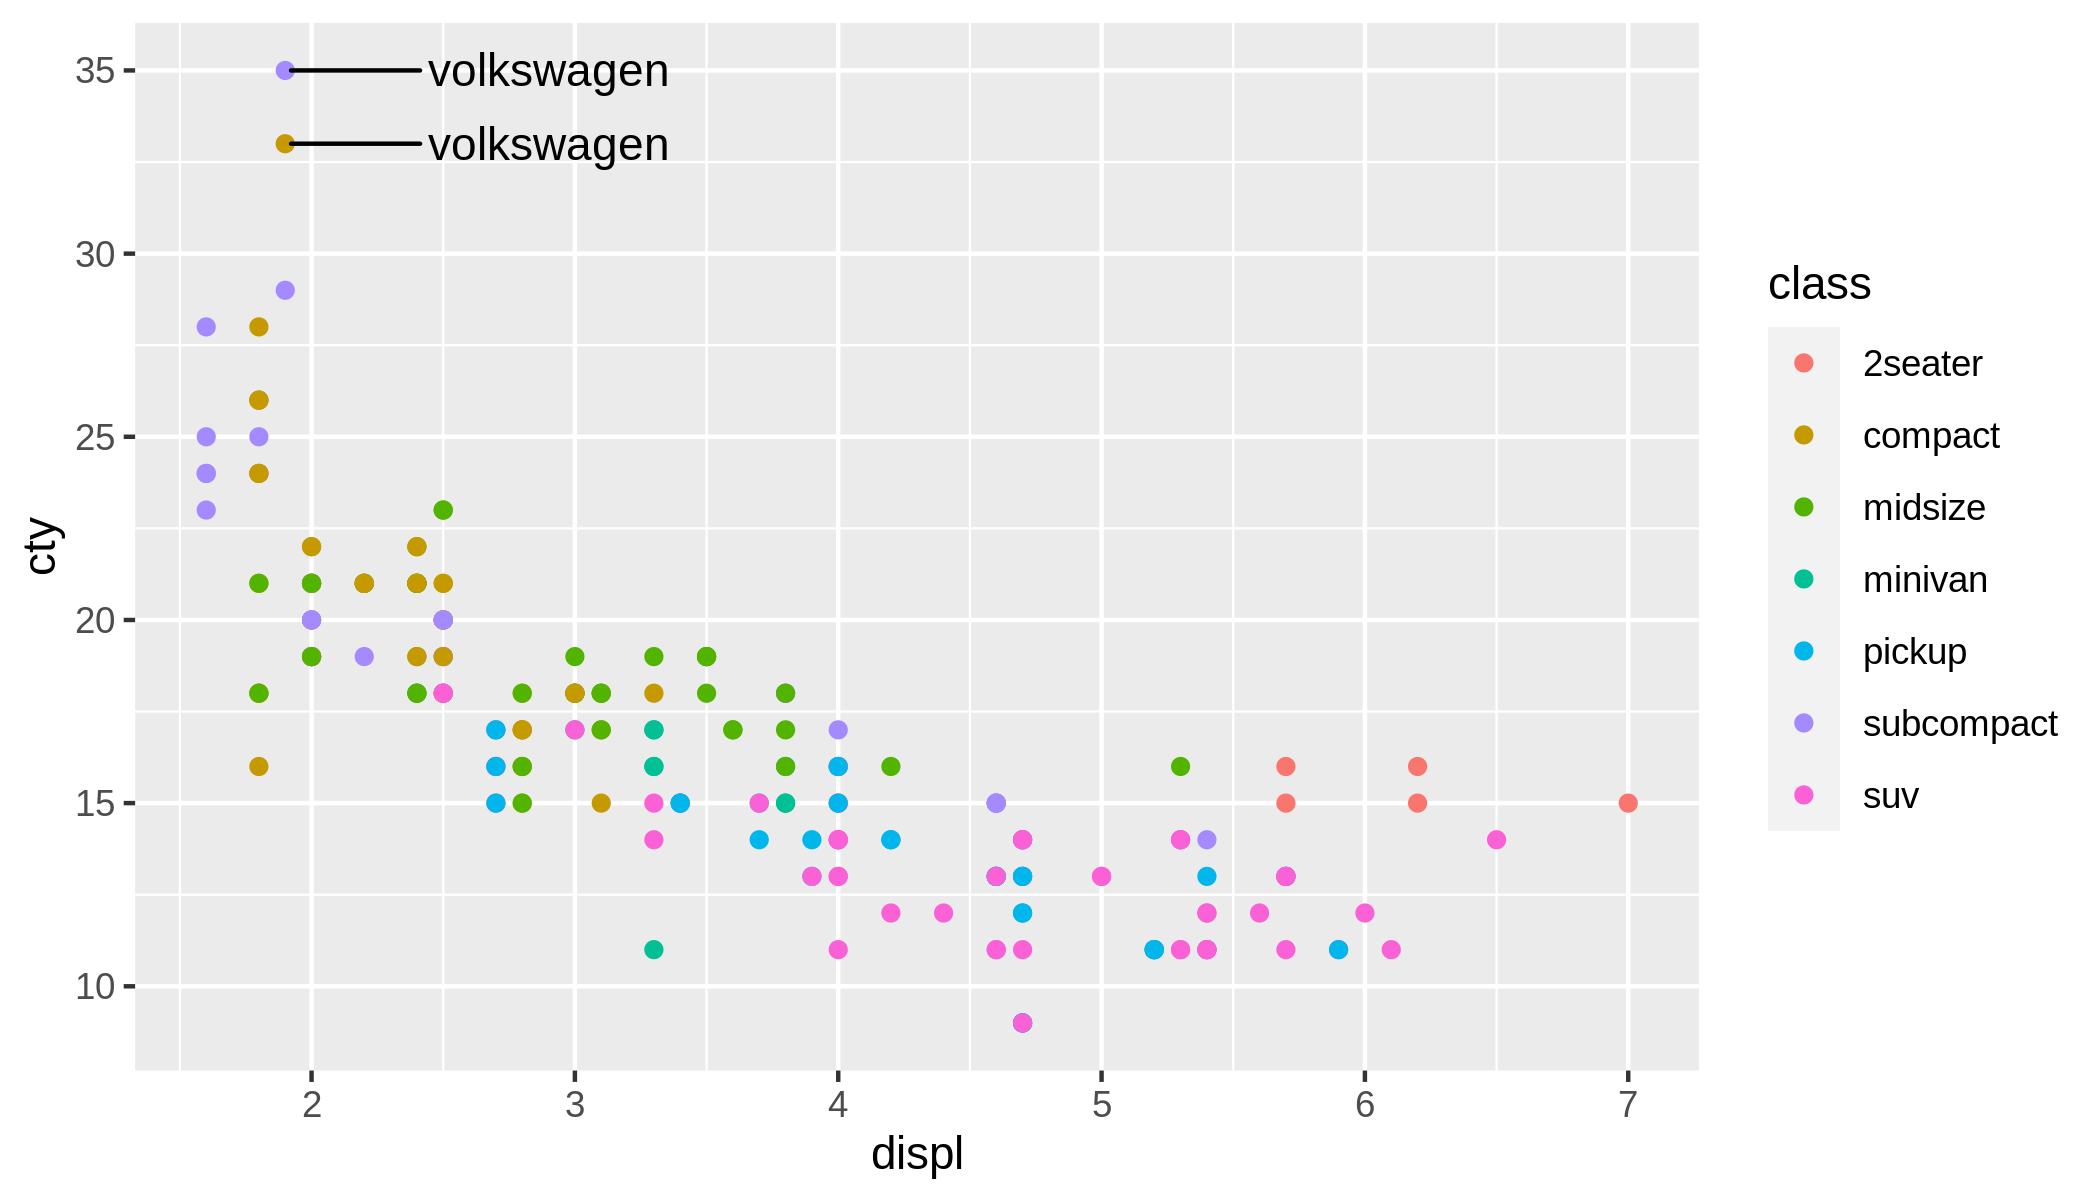

In [5]:
p = ggplot(mpg, aes(x = displ, y = cty, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')

p.cty = p

p

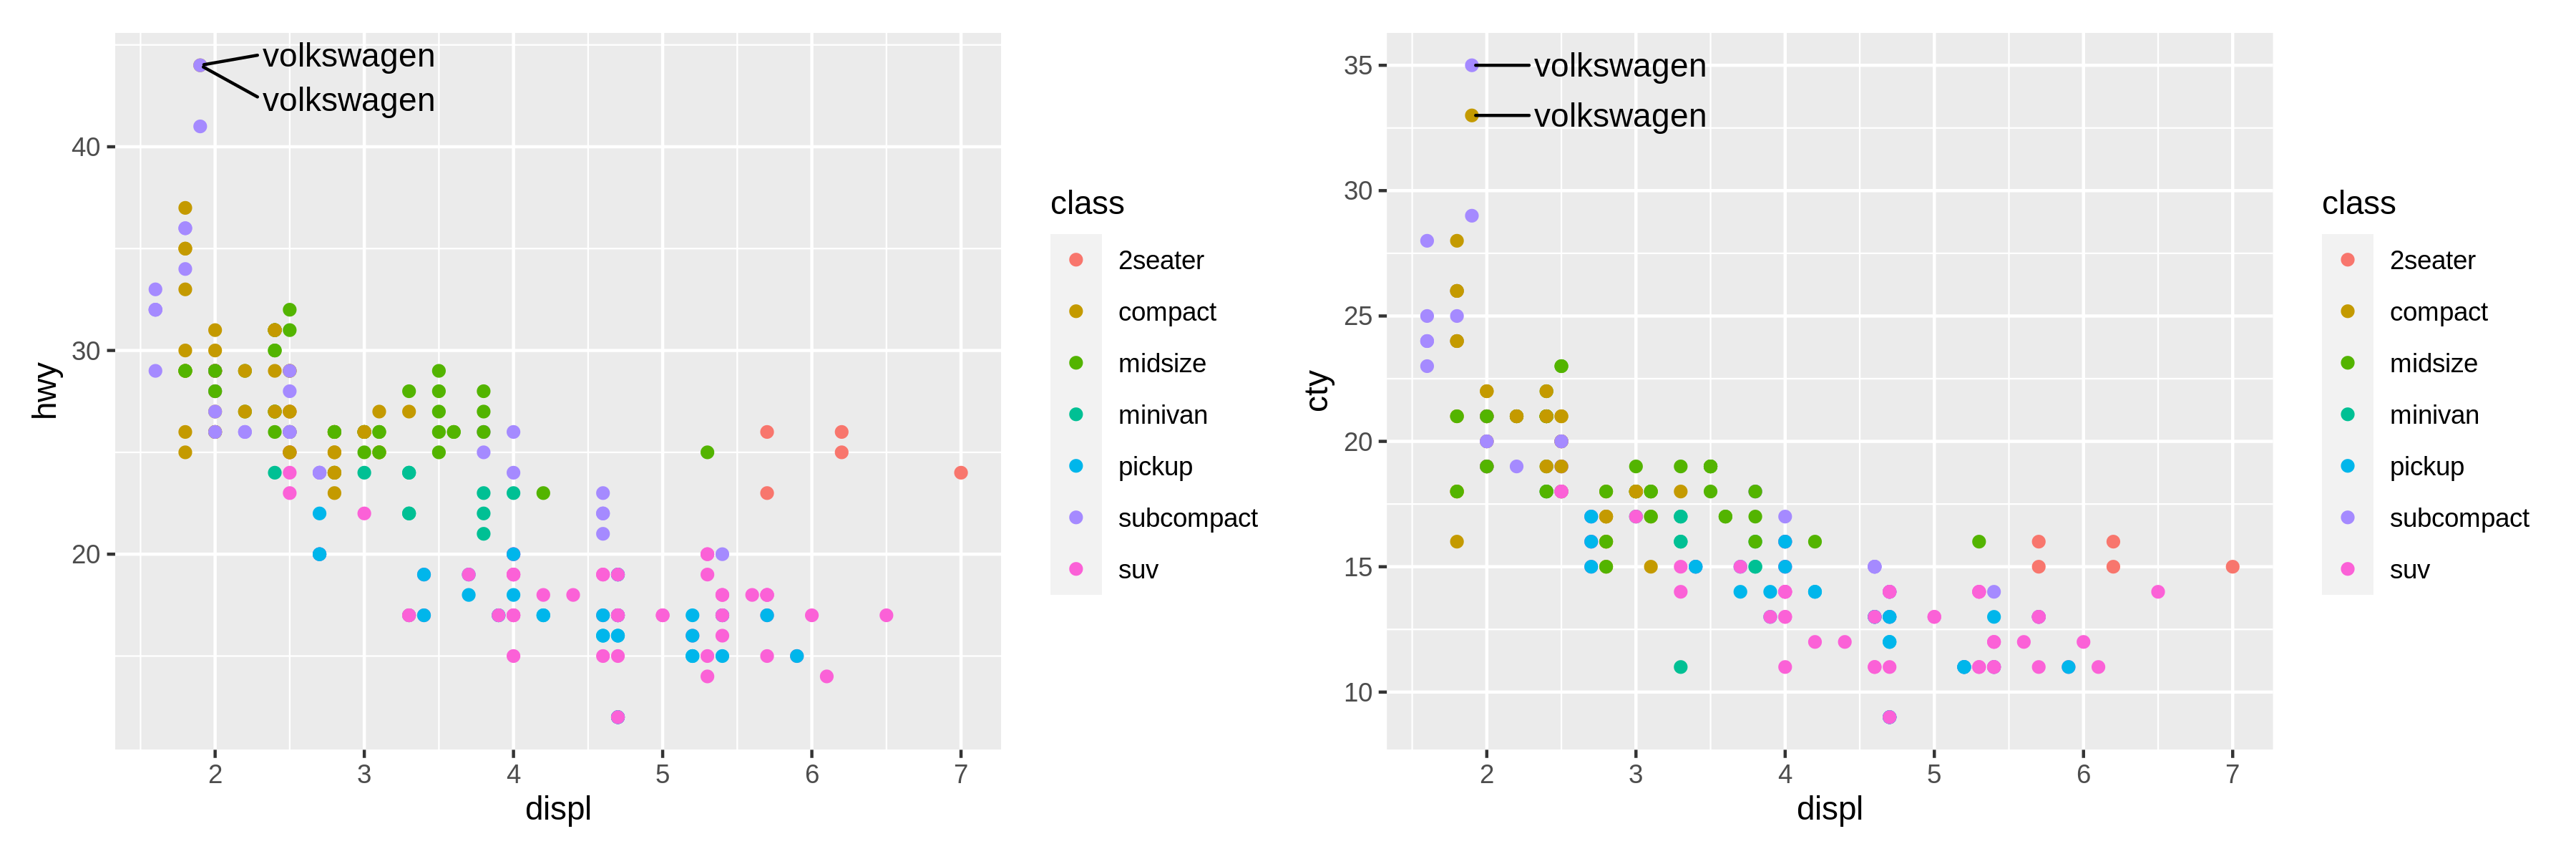

In [6]:
options(repr.plot.width = 12)
p.hwy + p.cty

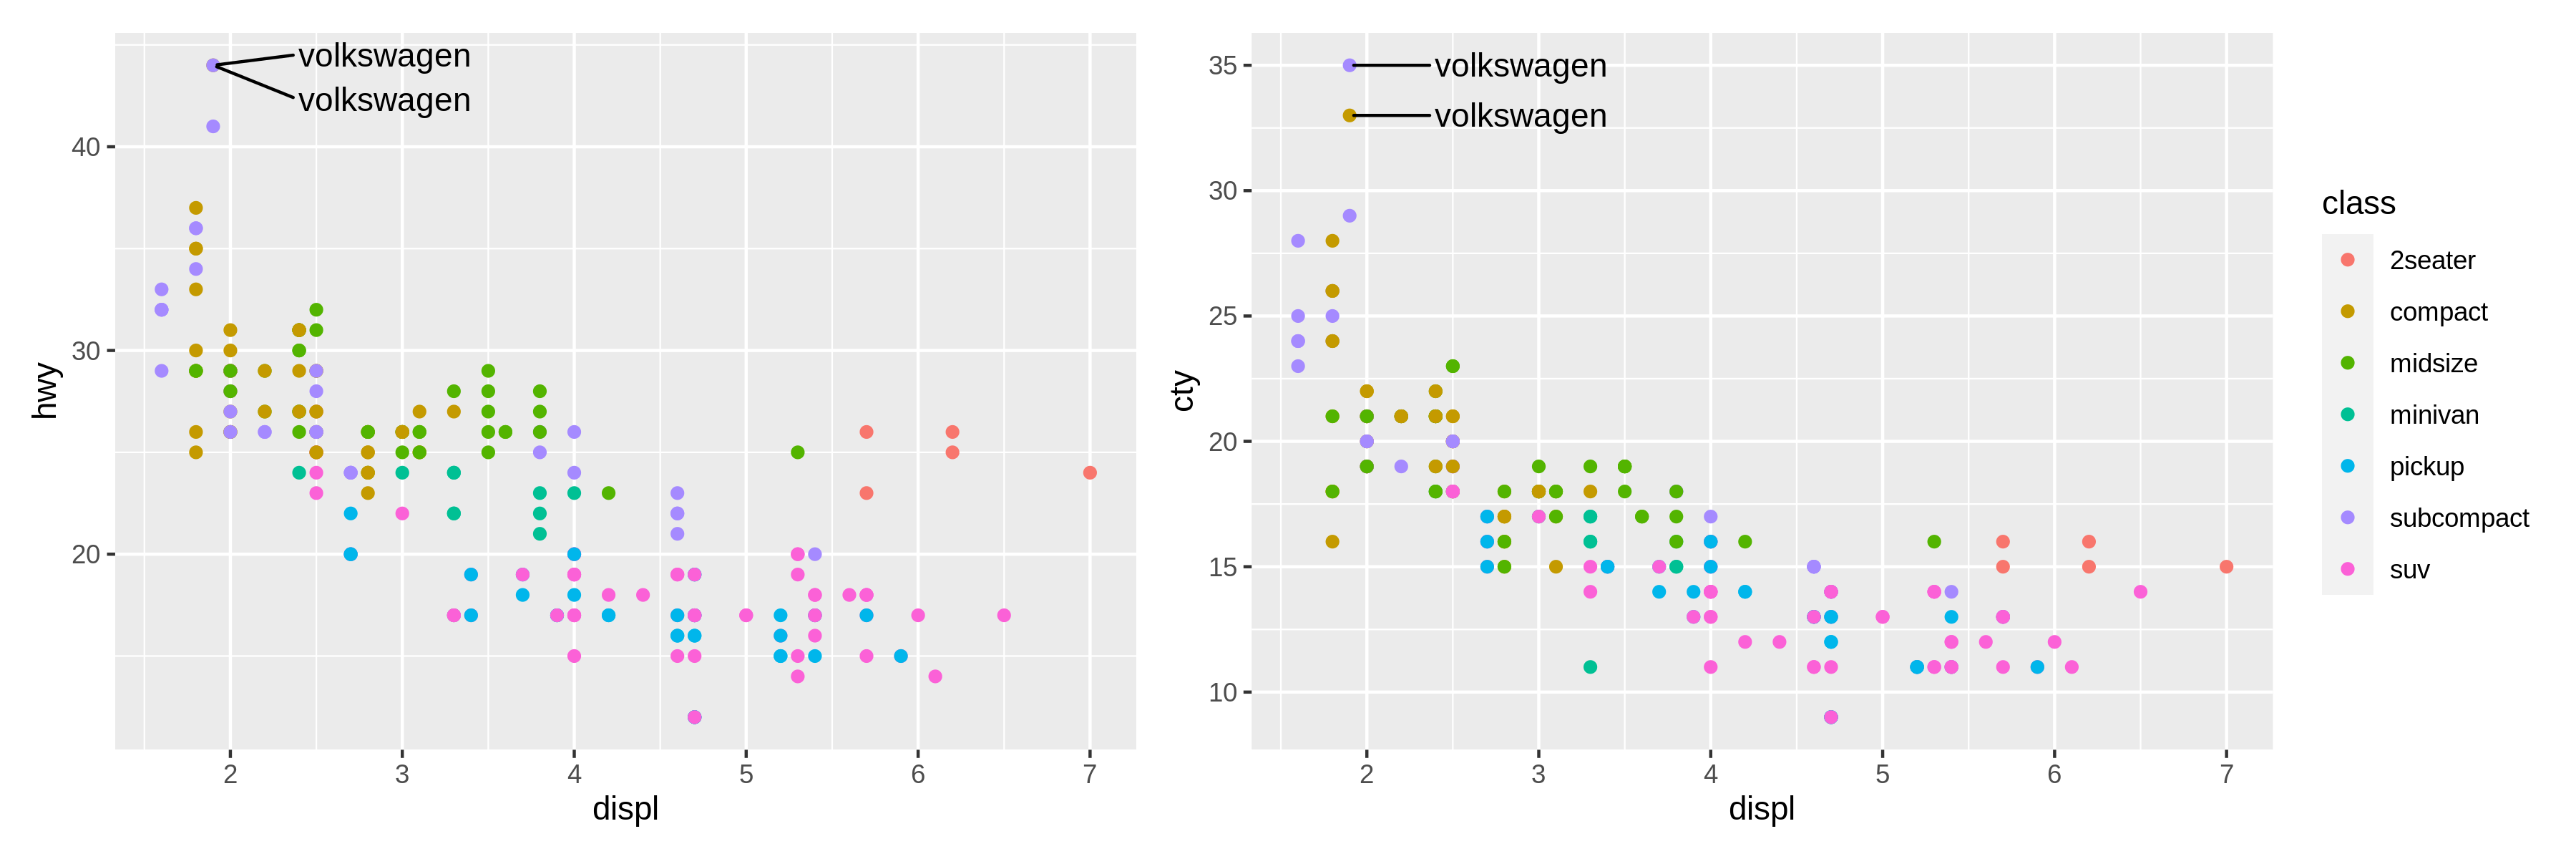

In [7]:
p.hwy = p.hwy + theme(legend.position = 'none')

p.hwy + p.cty

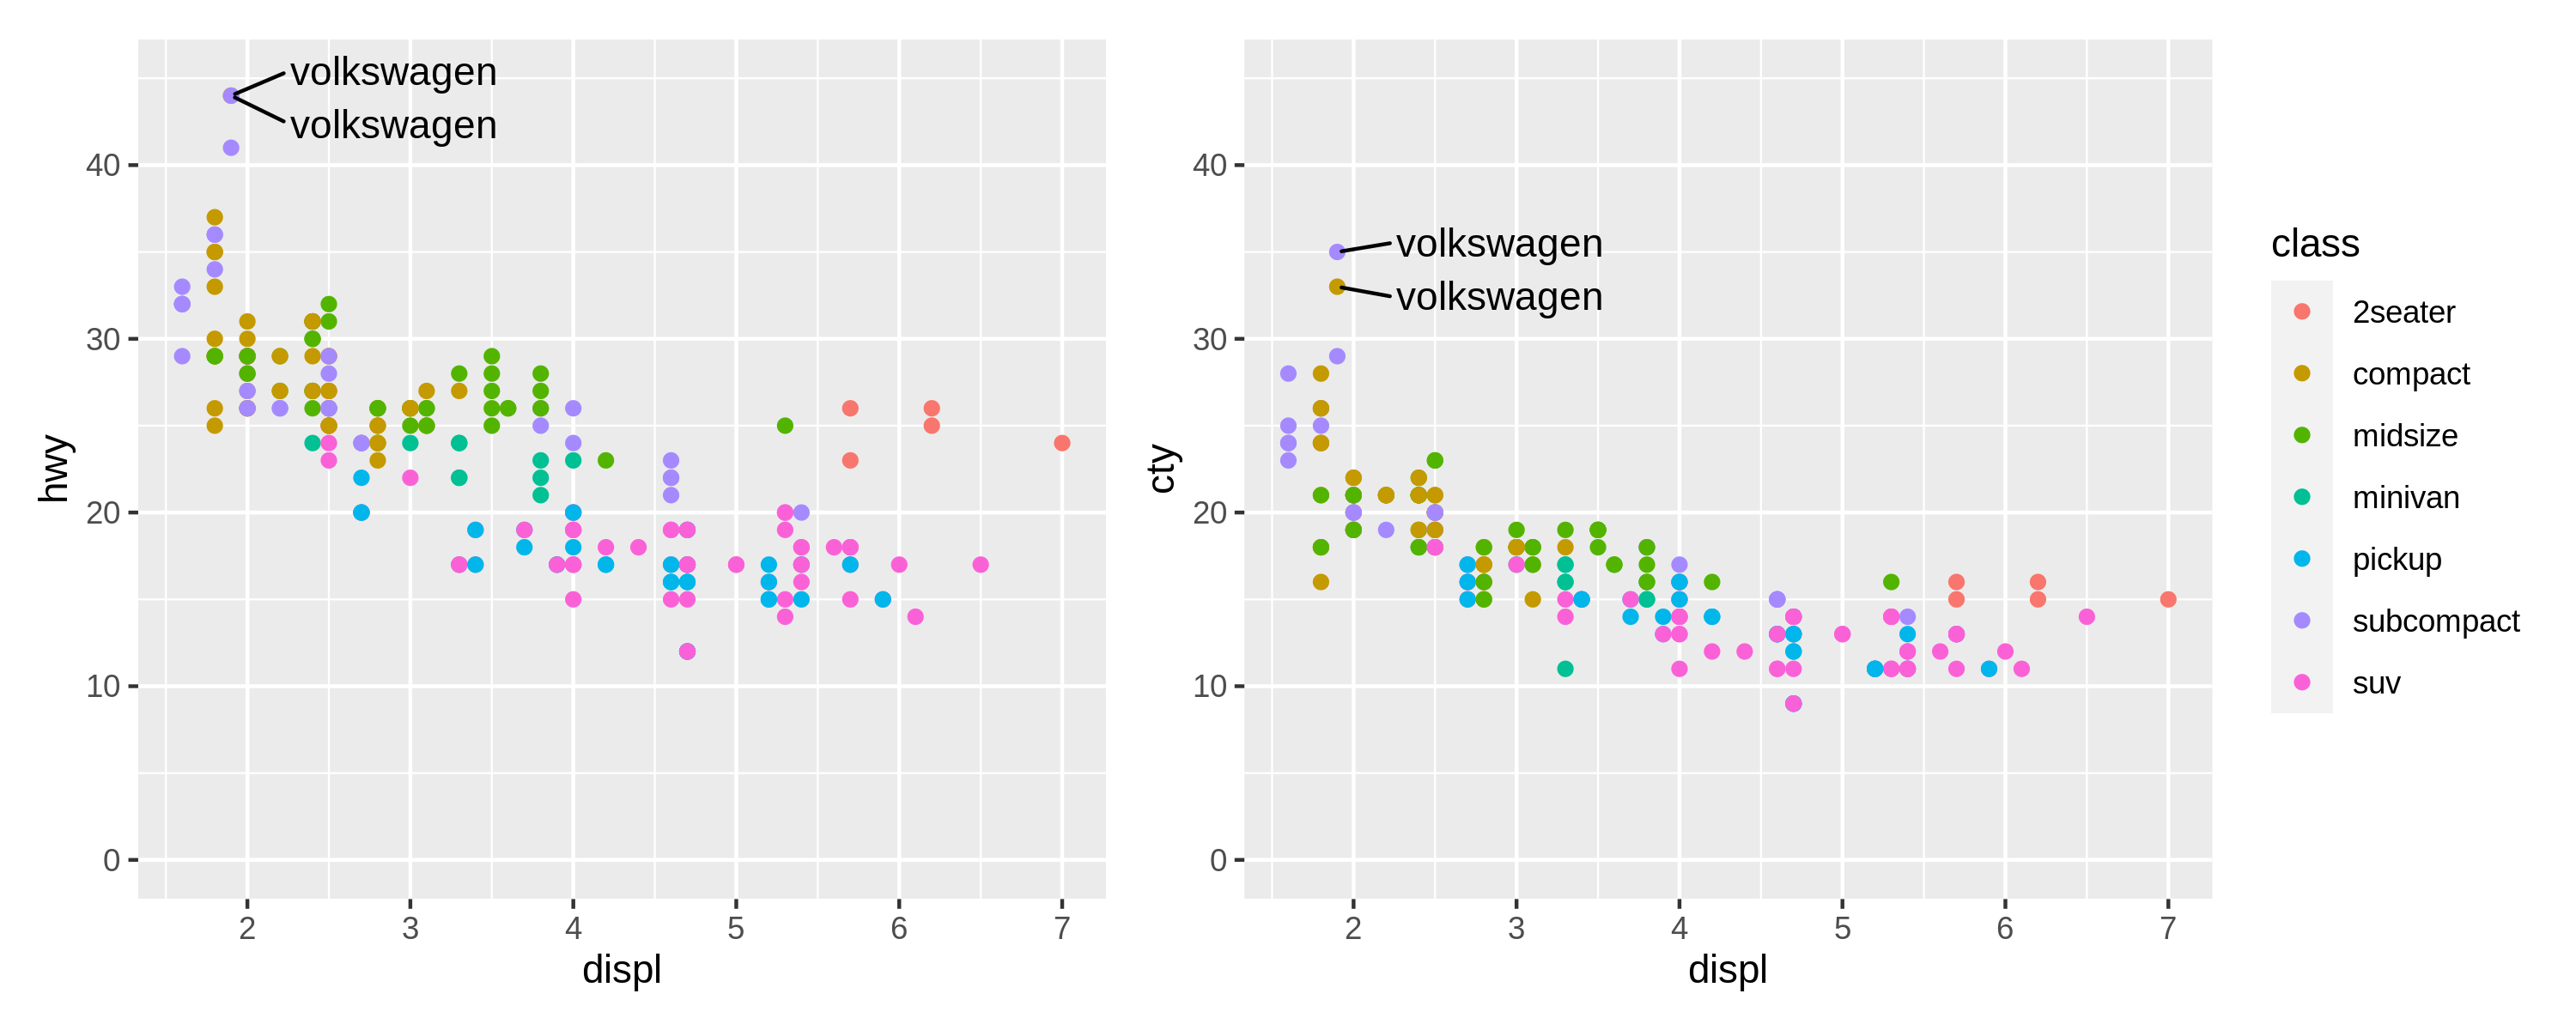

In [8]:
options(repr.plot.width = 10, repr.plot.height = 4)

p.hwy = p.hwy + ylim(c(0, 45))

p.cty = p.cty + ylim(c(0, 45))

p.hwy + p.cty

# Other summary functions

In [35]:
library('nycflights13')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


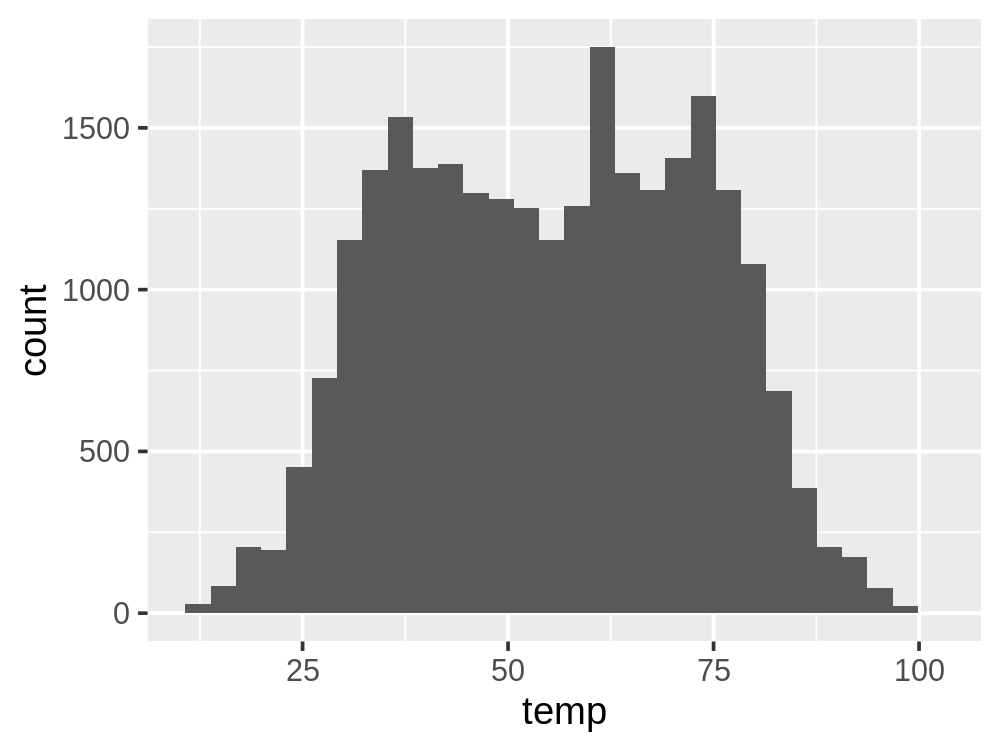

In [10]:
options(repr.plot.res = 250, repr.plot.width = 4, repr.plot.height = 3)

p = ggplot(weather, aes(x = temp))

p = p + geom_histogram()

p

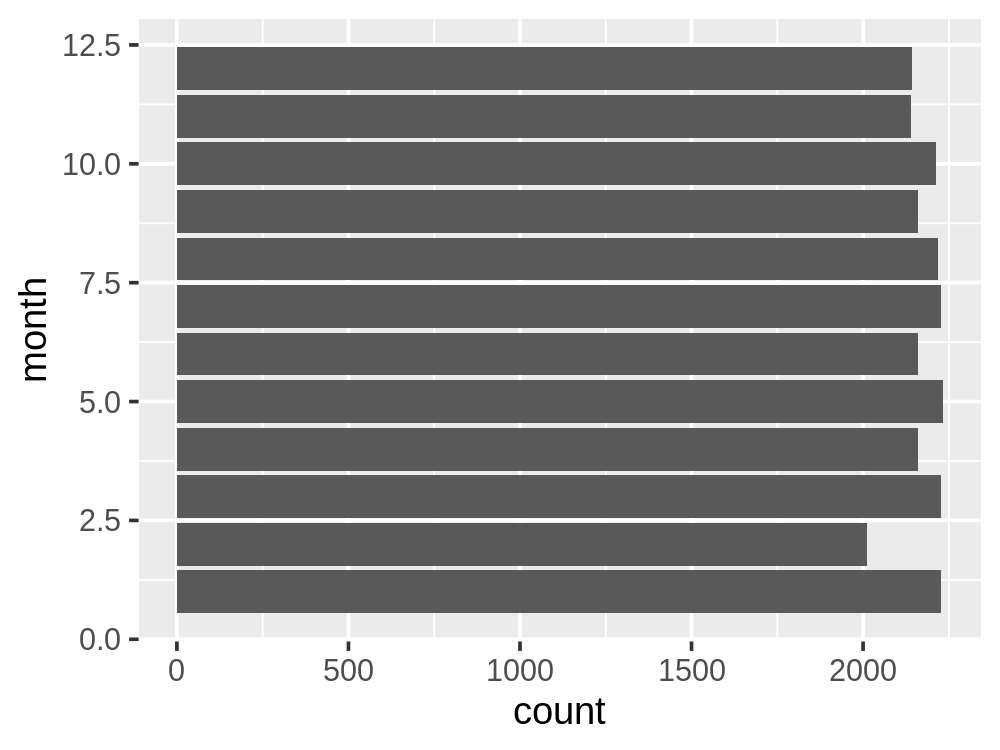

In [11]:
options(repr.plot.res = 250, repr.plot.width = 4, repr.plot.height = 3)

p = ggplot(weather, aes(y = month))

p = p + geom_bar()

p

In [12]:
c(100, 45, 50, 60) > 50

[1]  TRUE FALSE FALSE  TRUE

In [13]:
sum(c(100, 45, 50, 60) > 50)

[1] 2

In [14]:
weather |>
    group_by(month) |>
    summarize(max_temp = max(temp, na.rm = TRUE),
              obs = n(), 
              n_above_50 = sum(temp > 50, na.rm = TRUE),
              frac_above_50 = sum(temp > 50, na.rm = TRUE) / n())

month,max_temp,obs,n_above_50,frac_above_50
<int>,<dbl>,<int>,<int>,<dbl>
1,64.40,2226,113,0.050763702
2,55.94,2010,10,0.004975124
3,60.08,2227,145,0.065110013
4,84.02,2159,1183,0.547938861
5,93.02,2232,1978,0.886200717
6,93.92,2160,2160,1.000000000
7,100.04,2228,2228,1.000000000
8,89.96,2217,2216,0.999548940
9,95.00,2159,2132,0.987494210


In [15]:
weather |> head()

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [39]:
temp_median = weather |> 
    group_by (month) |> 
    summarize(temp = median(temp, na.rm=T))

temp_median |> head()

month,temp
<int>,<dbl>
1,37.04
2,33.98
3,39.02
4,51.98
5,60.98
6,71.96


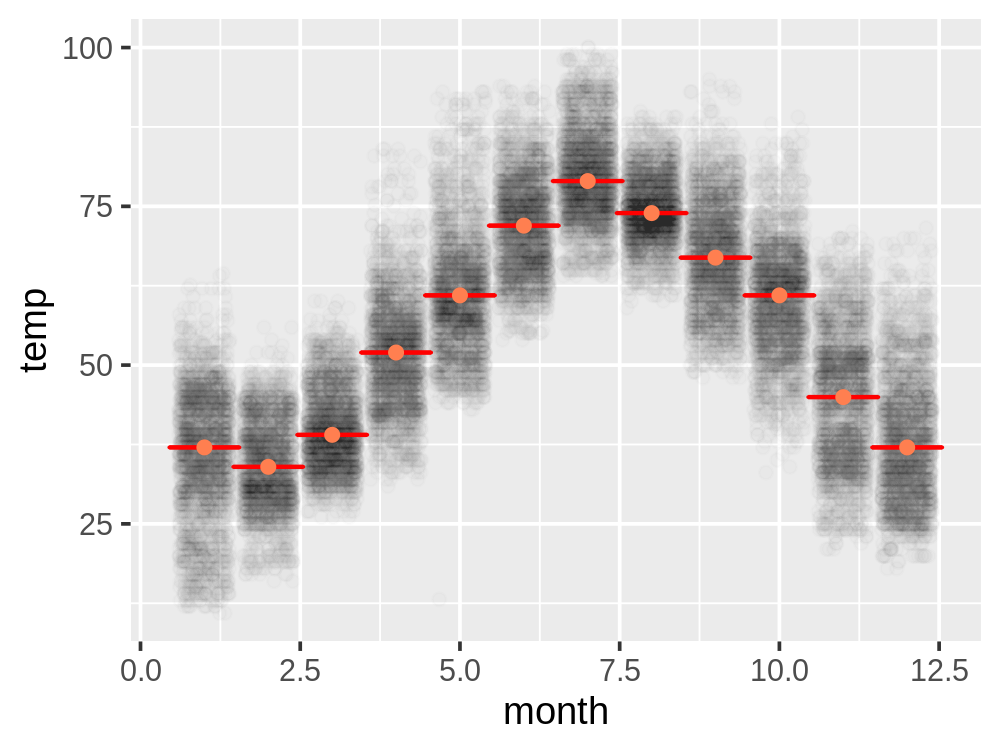

In [40]:
p = ggplot(weather, aes(x = month, y = temp, group = month))

p = p + geom_point(alpha = 0.01, na.rm = TRUE,
                   position = position_jitter(h = 0, w = 0.4))

p = p + geom_crossbar(data = temp_median, mapping = aes(y = temp, ymin = temp, ymax = temp),
              color = 'red', fatten = 1.2, width = 1.1)

p = p + geom_point(data = temp_median, color = 'coral')

p

## mean, median, max, min

In [16]:
weather |>
    group_by(month) |>
    summarize(median.temp = median(temp)) |>
    arrange(median.temp)

month,median.temp
<int>,<dbl>
2,33.98
1,37.04
12,37.04
3,39.02
11,44.96
4,51.98
5,60.98
10,60.98
9,66.92


In [ ]:
# Plot median with geom_crossbar

# geom_crossbar(data = df_median, mapping = aes(y = median.temp, ymin = median.temp, ymax = median.temp),
#               color = 'steelblue', fatten = 1, width = 0.8)

## sd, IQR

In [17]:
weather |>
    group_by(month) |>
    summarize(sd.temp = sd(temp)) |>
    arrange(sd.temp)

month,sd.temp
<int>,<dbl>
3,6.249278
2,6.982378
7,7.119899
6,7.546371
9,8.465902
4,8.786168
10,8.846035
5,9.681644
12,9.982432
